In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
df_train = pd.read_csv("train data credit card.csv")
df_test = pd.read_csv("test data credit card.csv")

# 1.EDA

In [2]:
df_train.shape

(245725, 11)

In [3]:
df_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
mean_lead = sum(list(df_train["Is_Lead"]))/len(list(df_train["Is_Lead"])) 
mean_lead

0.23720826126767727

In [5]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
df_train["Credit_Product"] = df_train["Credit_Product"].str[0].fillna("X")
df_test["Credit_Product"] = df_train["Credit_Product"].str[0].fillna("X")

In [10]:
df_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [7]:
df_gender= df_train.groupby("Gender").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_gender["lead_rate"] = df_gender["Is_Lead"]/df_gender["ID"]
df_gender.columns = ["Gender", "ID_count", "Is_Lead_count","lead_rate"] 

In [11]:
df_gender

,Gender,ID_count,Is_Lead_count,lead_rate
0,Female,111528,22705,0.203581
1,Male,134197,35583,0.265155


In [12]:
df_occupation= df_train.groupby("Occupation").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_occupation["lead_rate"] = df_occupation["Is_Lead"]/df_occupation["ID"]
df_occupation.columns = ["Occupation", "ID_count", "Is_Lead_count","lead_rate"] 
df_occupation

,Occupation,ID_count,Is_Lead_count,lead_rate
0,Entrepreneur,2667,1762,0.660667
1,Other,70173,17189,0.244952
2,Salaried,71999,11496,0.159669
3,Self_Employed,100886,27841,0.275965


In [13]:
df_productholding= df_train.groupby("Credit_Product").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_productholding["lead_rate"] = df_productholding["Is_Lead"]/df_productholding["ID"]
df_productholding.columns = ["Credit_Product", "ID_count", "Is_Lead_count","lead_rate"] 
df_productholding

,Credit_Product,ID_count,Is_Lead_count,lead_rate
0,N,144357,10623,0.073588
1,X,29325,24975,0.851662
2,Y,72043,22690,0.314951


In [14]:
df_region= df_train.groupby("Region_Code").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_region["lead_rate"] = df_region["Is_Lead"]/df_region["ID"]
df_region.columns = ["Region_Code", "ID_count", "Is_Lead_count","lead_rate"] 
df_region

,Region_Code,ID_count,Is_Lead_count,lead_rate
0,RG250,2496,393,0.157452
1,RG251,5950,1381,0.232101
2,RG252,4286,592,0.138124
3,RG253,1858,481,0.258881
4,RG254,26840,5713,0.212854
5,RG255,2018,469,0.232408
6,RG256,2847,401,0.140850
7,RG257,6101,1170,0.191772
8,RG258,1951,430,0.220400
9,RG259,2586,501,0.193735


In [15]:
df_channel= df_train.groupby("Channel_Code").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_channel["lead_rate"] = df_channel["Is_Lead"]/df_channel["ID"]
df_channel.columns = ["Channel_Code", "ID_count", "Is_Lead_count","lead_rate"] 
df_channel

,Channel_Code,ID_count,Is_Lead_count,lead_rate
0,X1,103718,9482,0.091421
1,X2,67726,22207,0.327895
2,X3,68712,25219,0.367025
3,X4,5569,1380,0.247800


In [16]:
df_active= df_train.groupby("Is_Active").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_active["lead_rate"] = df_active["Is_Lead"]/df_active["ID"]
df_active.columns = ["Is_Active", "ID_count", "Is_Lead_count","lead_rate"] 
df_active

,Is_Active,ID_count,Is_Lead_count,lead_rate
0,No,150290,31283,0.208151
1,Yes,95435,27005,0.282967


In [17]:
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,N,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,N,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,N,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,N,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,N,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,X,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,N,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,N,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,N,407504,No,0


In [18]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
df_train["Vintage_binned"] = pd.cut(df_train['Vintage'], bins=bins)
df_test["Vintage_binned"] = pd.cut(df_test['Vintage'], bins=bins)
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Vintage_binned
0,NNVBBKZB,Female,73,RG268,Other,X3,43,N,1045696,No,0,"(40, 50]"
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,N,581988,No,0,"(30, 40]"
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,N,1484315,Yes,0,"(20, 30]"
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,N,470454,No,0,"(10, 20]"
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,N,886787,No,0,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,X,1925586,No,0,"(100, 110]"
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,N,862952,Yes,0,"(10, 20]"
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,N,670659,No,0,"(10, 20]"
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,N,407504,No,0,"(30, 40]"


In [19]:
df_vintage= df_train.groupby("Vintage_binned").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_vintage["lead_rate"] = df_vintage["Is_Lead"]/df_vintage["ID"]
df_vintage.columns = ["Vintage_binned", "ID_count", "Is_Lead_count","lead_rate"] 
df_vintage

,Vintage_binned,ID_count,Is_Lead_count,lead_rate
0,"(0, 10]",1905,430,0.225722
1,"(10, 20]",61091,8942,0.146372
2,"(20, 30]",44993,6594,0.146556
3,"(30, 40]",35634,4845,0.135966
4,"(40, 50]",10070,2005,0.199106
5,"(50, 60]",10917,1930,0.176788
6,"(60, 70]",17249,5073,0.294104
7,"(70, 80]",12458,5025,0.403355
8,"(80, 90]",11554,5595,0.484248
9,"(90, 100]",20146,10240,0.508289


In [21]:
bins = [20, 30, 40, 50, 60, 85]
df_train["age_bin"] = pd.cut(df_train['Age'], bins=bins)
df_test["age_bin"] = pd.cut(df_test['Age'], bins=bins)
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Vintage_binned,age_bin
0,NNVBBKZB,Female,73,RG268,Other,X3,43,N,1045696,No,0,"(40, 50]","(60, 85]"
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,N,581988,No,0,"(30, 40]","(20, 30]"
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,N,1484315,Yes,0,"(20, 30]","(50, 60]"
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,N,470454,No,0,"(10, 20]","(30, 40]"
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,N,886787,No,0,"(30, 40]","(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,X,1925586,No,0,"(100, 110]","(50, 60]"
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,N,862952,Yes,0,"(10, 20]","(20, 30]"
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,N,670659,No,0,"(10, 20]","(20, 30]"
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,N,407504,No,0,"(30, 40]","(20, 30]"


In [22]:
df_age= df_train.groupby("age_bin").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_age["lead_rate"] = df_age["Is_Lead"]/df_age["ID"]
df_age.columns = ["age_bin", "ID_count", "Is_Lead_count","lead_rate"] 
df_age

,age_bin,ID_count,Is_Lead_count,lead_rate
0,"(20, 30]",68140,4856,0.071265
1,"(30, 40]",44729,7723,0.172662
2,"(40, 50]",53827,18945,0.351961
3,"(50, 60]",44431,16272,0.366231
4,"(60, 85]",34598,10492,0.303255


In [23]:
df_train["Avg_Account_Balance_in_000"] = df_train["Avg_Account_Balance"]/1000
df_test["Avg_Account_Balance_in_000"] = df_test["Avg_Account_Balance"]/1000

In [24]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 11000]
df_train["Balance_binned"] = pd.cut(df_train['Avg_Account_Balance_in_000'], bins=bins)
df_test["Balance_binned"] = pd.cut(df_test['Avg_Account_Balance_in_000'], bins=bins)
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Vintage_binned,age_bin,Avg_Account_Balance_in_000,Balance_binned
0,NNVBBKZB,Female,73,RG268,Other,X3,43,N,1045696,No,0,"(40, 50]","(60, 85]",1045.696,"(1000, 1500]"
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,N,581988,No,0,"(30, 40]","(20, 30]",581.988,"(500, 1000]"
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,N,1484315,Yes,0,"(20, 30]","(50, 60]",1484.315,"(1000, 1500]"
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,N,470454,No,0,"(10, 20]","(30, 40]",470.454,"(0, 500]"
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,N,886787,No,0,"(30, 40]","(20, 30]",886.787,"(500, 1000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,X,1925586,No,0,"(100, 110]","(50, 60]",1925.586,"(1500, 2000]"
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,N,862952,Yes,0,"(10, 20]","(20, 30]",862.952,"(500, 1000]"
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,N,670659,No,0,"(10, 20]","(20, 30]",670.659,"(500, 1000]"
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,N,407504,No,0,"(30, 40]","(20, 30]",407.504,"(0, 500]"


In [25]:
df_balance= df_train.groupby("Balance_binned").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_balance["lead_rate"] = df_balance["Is_Lead"]/df_balance["ID"]
df_balance.columns = ["Balance_binned", "ID_count", "Is_Lead_count","lead_rate"] 
df_balance

,Balance_binned,ID_count,Is_Lead_count,lead_rate
0,"(0, 500]",38059,7006,0.184083
1,"(500, 1000]",102557,22860,0.222900
2,"(1000, 1500]",54160,14153,0.261318
3,"(1500, 2000]",24893,7052,0.283292
4,"(2000, 2500]",11314,3219,0.284515
5,"(2500, 3000]",5855,1606,0.274295
6,"(3000, 3500]",3149,888,0.281994
7,"(3500, 11000]",5738,1504,0.262112


In [26]:
df_age= df_train.groupby("age_bin").agg({"ID":"count", "Is_Lead":"sum"}).reset_index()
df_age["lead_rate"] = df_age["Is_Lead"]/df_age["ID"]
df_age.columns = ["age_bin", "ID_count", "Is_Lead_count","lead_rate"] 
df_age

,age_bin,ID_count,Is_Lead_count,lead_rate
0,"(20, 30]",68140,4856,0.071265
1,"(30, 40]",44729,7723,0.172662
2,"(40, 50]",53827,18945,0.351961
3,"(50, 60]",44431,16272,0.366231
4,"(60, 85]",34598,10492,0.303255


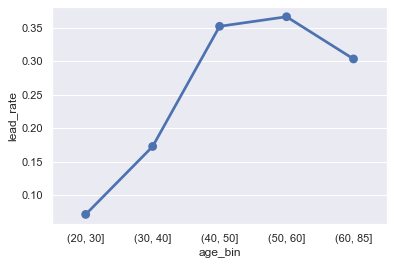

In [82]:
sns.pointplot(data=df_age, x="age_bin", y="lead_rate")
sns.set_theme()

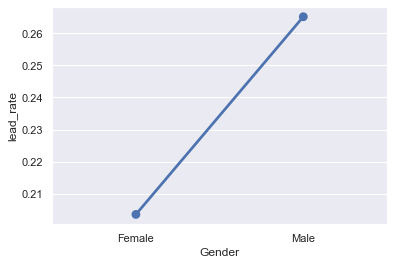

In [83]:
sns.pointplot(data=df_gender, x="Gender", y="lead_rate")
sns.set_theme()

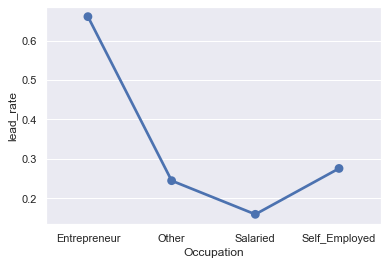

In [84]:
sns.pointplot(data=df_occupation, x="Occupation", y="lead_rate")
sns.set_theme()

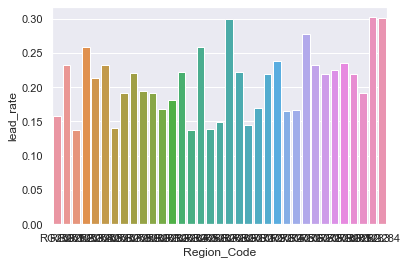

In [86]:
sns.barplot(data=df_region, x="Region_Code", y="lead_rate")
sns.set_theme()

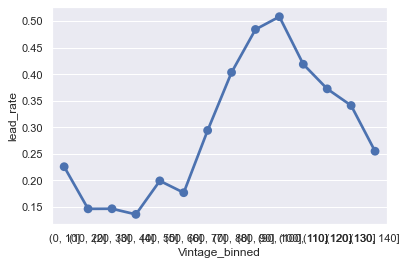

In [87]:
sns.pointplot(data=df_vintage, x="Vintage_binned", y="lead_rate")
sns.set_theme()

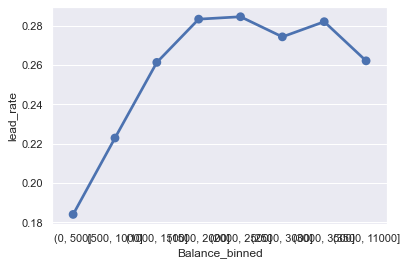

In [88]:
sns.pointplot(data=df_balance, x="Balance_binned", y="lead_rate")
sns.set_theme()

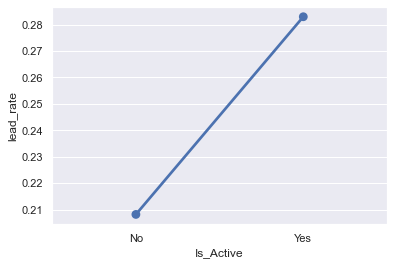

In [89]:
sns.pointplot(data=df_active, x="Is_Active", y="lead_rate")
sns.set_theme()

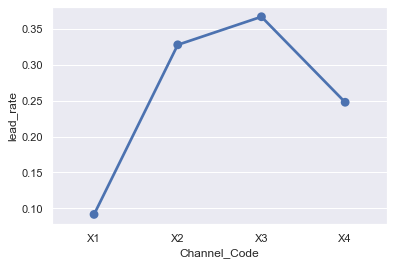

In [90]:
sns.pointplot(data=df_channel, x="Channel_Code", y="lead_rate")
sns.set_theme()

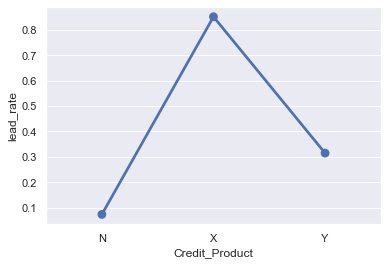

In [91]:
sns.pointplot(data=df_productholding, x="Credit_Product", y="lead_rate")
sns.set_theme()

# 2. Data Cleansing

In [28]:
df_train1 = df_train[["Gender","Age","age_bin","Vintage_binned", "Region_Code", "Occupation", "Channel_Code", "Credit_Product", "Avg_Account_Balance_in_000","Balance_binned", "Is_Lead","Is_Active"]]
df_test1 = df_test[["Gender","Age","age_bin","Vintage_binned", "Region_Code", "Occupation", "Channel_Code", "Credit_Product", "Avg_Account_Balance_in_000","Balance_binned","Is_Active"]]


In [29]:
df_train1

,Gender,Age,age_bin,Vintage_binned,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance_in_000,Balance_binned,Is_Lead,Is_Active
0,Female,73,"(60, 85]","(40, 50]",RG268,Other,X3,N,1045.696,"(1000, 1500]",0,No
1,Female,30,"(20, 30]","(30, 40]",RG277,Salaried,X1,N,581.988,"(500, 1000]",0,No
2,Female,56,"(50, 60]","(20, 30]",RG268,Self_Employed,X3,N,1484.315,"(1000, 1500]",0,Yes
3,Male,34,"(30, 40]","(10, 20]",RG270,Salaried,X1,N,470.454,"(0, 500]",0,No
4,Female,30,"(20, 30]","(30, 40]",RG282,Salaried,X1,N,886.787,"(500, 1000]",0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,"(50, 60]","(100, 110]",RG284,Self_Employed,X3,X,1925.586,"(1500, 2000]",0,No
245721,Male,27,"(20, 30]","(10, 20]",RG268,Salaried,X1,N,862.952,"(500, 1000]",0,Yes
245722,Female,26,"(20, 30]","(10, 20]",RG281,Salaried,X1,N,670.659,"(500, 1000]",0,No
245723,Female,28,"(20, 30]","(30, 40]",RG273,Salaried,X1,N,407.504,"(0, 500]",0,No


In [30]:
df_train1.isnull().sum()

Gender                        0
Age                           0
age_bin                       0
Vintage_binned                0
Region_Code                   0
Occupation                    0
Channel_Code                  0
Credit_Product                0
Avg_Account_Balance_in_000    0
Balance_binned                0
Is_Lead                       0
Is_Active                     0
dtype: int64

In [31]:
df_train_n = pd.get_dummies(df_train1, ["Gender","age_bin","Region_Code", "Occupation","Channel_Code","Credit_Product","Vintage_binned","Balance_binned","Is_Active"]).drop(columns=["Age","Avg_Account_Balance_in_000"])

In [32]:
df_test_n = pd.get_dummies(df_test1, ["Gender","age_bin","Region_Code", "Occupation","Channel_Code","Credit_Product","Vintage_binned","Balance_binned","Is_Active"]).drop(columns=["Age","Avg_Account_Balance_in_000"])

In [33]:
df_train_n 

,Is_Lead,Gender_Female,Gender_Male,"age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 85]","Region_Code_(0, 10]","Region_Code_(10, 20]",...,"Balance_binned_(0, 500]","Balance_binned_(500, 1000]","Balance_binned_(1000, 1500]","Balance_binned_(1500, 2000]","Balance_binned_(2000, 2500]","Balance_binned_(2500, 3000]","Balance_binned_(3000, 3500]","Balance_binned_(3500, 11000]",Is_Active_No,Is_Active_Yes
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
245721,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
245722,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
245723,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [44]:
df_test_n 

,Gender_Female,Gender_Male,"age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 85]","Region_Code_(0, 10]","Region_Code_(10, 20]","Region_Code_(20, 30]",...,"Balance_binned_(0, 500]","Balance_binned_(500, 1000]","Balance_binned_(1000, 1500]","Balance_binned_(1500, 2000]","Balance_binned_(2000, 2500]","Balance_binned_(2500, 3000]","Balance_binned_(3000, 3500]","Balance_binned_(3500, 11000]",Is_Active_No,Is_Active_Yes
0,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
105308,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
105309,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
105310,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [34]:
X = df_train_n.drop(columns=["Is_Lead"])
y = df_train_n["Is_Lead"]

In [35]:
df_train_n.dtypes

Is_Lead                         int64
Gender_Female                   uint8
Gender_Male                     uint8
age_bin_(20, 30]                uint8
age_bin_(30, 40]                uint8
                                ...  
Balance_binned_(2500, 3000]     uint8
Balance_binned_(3000, 3500]     uint8
Balance_binned_(3500, 11000]    uint8
Is_Active_No                    uint8
Is_Active_Yes                   uint8
Length: 78, dtype: object

# 3. ML Model Training

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=99)

### 3.1 Logistic Regression

In [39]:
from sklearn.model_selection import GridSearchCV 
model = LogisticRegression()
parameters = {'C':[1,10,100]}
model.fit(X_train, y_train)
y_pred_train_lg = model.predict(X_train)
y_pred_test_lg = model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37594
           1       0.81      0.52      0.64     11551

    accuracy                           0.86     49145
   macro avg       0.84      0.74      0.77     49145
weighted avg       0.85      0.86      0.85     49145



### 3.2 Random Forest Tree

In [41]:
rf = RandomForestClassifier(n_estimators =1000)
rf.fit(X_train,y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [42]:
accuracy_score(y_train,y_pred_train_rf)

0.9241733645335233

In [43]:
accuracy_score(y_test,y_pred_test_rf)

0.8440126157289654

In [44]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     37594
           1       0.71      0.58      0.63     11551

    accuracy                           0.84     49145
   macro avg       0.79      0.75      0.77     49145
weighted avg       0.84      0.84      0.84     49145



### 3.3 GussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
import sklearn.metrics

In [48]:
classifier = GaussianNB()
classifier = classifier.fit(X_train, y_train)

y_pred_train_GNB = classifier.predict(X_train)
y_pred_test_GNB = classifier.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_test_GNB))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     37594
           1       0.45      0.74      0.56     11551

    accuracy                           0.72     49145
   macro avg       0.67      0.73      0.68     49145
weighted avg       0.79      0.72      0.74     49145



# 4. Propensity

In [50]:
import matplotlib.pylab as plt


In [51]:
predictors = df_train_n.select_dtypes(include=['number'])
predictors = predictors.drop(['Is_Lead'], axis=1)

In [52]:
print(predictors.columns.size)
print(predictors.columns)

77
Index(['Gender_Female', 'Gender_Male', 'age_bin_(20, 30]', 'age_bin_(30, 40]',
       'age_bin_(40, 50]', 'age_bin_(50, 60]', 'age_bin_(60, 85]',
       'Region_Code_(0, 10]', 'Region_Code_(10, 20]', 'Region_Code_(20, 30]',
       'Region_Code_(30, 40]', 'Region_Code_(40, 50]', 'Region_Code_(50, 60]',
       'Region_Code_(60, 70]', 'Region_Code_(70, 80]', 'Region_Code_(80, 90]',
       'Region_Code_(90, 100]', 'Region_Code_(100, 110]',
       'Region_Code_(110, 120]', 'Region_Code_(120, 130]',
       'Region_Code_(130, 140]', 'Occupation_RG250', 'Occupation_RG251',
       'Occupation_RG252', 'Occupation_RG253', 'Occupation_RG254',
       'Occupation_RG255', 'Occupation_RG256', 'Occupation_RG257',
       'Occupation_RG258', 'Occupation_RG259', 'Occupation_RG260',
       'Occupation_RG261', 'Occupation_RG262', 'Occupation_RG263',
       'Occupation_RG264', 'Occupation_RG265', 'Occupation_RG266',
       'Occupation_RG267', 'Occupation_RG268', 'Occupation_RG269',
       'Occupation_RG27

In [53]:
targets = df_train_n.Is_Lead
print(targets)

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64


In [54]:
prospects = df_test_n

In [55]:
print(prospects.columns.size)
print(prospects.columns)

77
Index(['Gender_Female', 'Gender_Male', 'age_bin_(20, 30]', 'age_bin_(30, 40]',
       'age_bin_(40, 50]', 'age_bin_(50, 60]', 'age_bin_(60, 85]',
       'Region_Code_(0, 10]', 'Region_Code_(10, 20]', 'Region_Code_(20, 30]',
       'Region_Code_(30, 40]', 'Region_Code_(40, 50]', 'Region_Code_(50, 60]',
       'Region_Code_(60, 70]', 'Region_Code_(70, 80]', 'Region_Code_(80, 90]',
       'Region_Code_(90, 100]', 'Region_Code_(100, 110]',
       'Region_Code_(110, 120]', 'Region_Code_(120, 130]',
       'Region_Code_(130, 140]', 'Occupation_RG250', 'Occupation_RG251',
       'Occupation_RG252', 'Occupation_RG253', 'Occupation_RG254',
       'Occupation_RG255', 'Occupation_RG256', 'Occupation_RG257',
       'Occupation_RG258', 'Occupation_RG259', 'Occupation_RG260',
       'Occupation_RG261', 'Occupation_RG262', 'Occupation_RG263',
       'Occupation_RG264', 'Occupation_RG265', 'Occupation_RG266',
       'Occupation_RG267', 'Occupation_RG268', 'Occupation_RG269',
       'Occupation_RG27

In [56]:
print(prospects.shape)

(105312, 77)


In [57]:
prospects['propensity'] = model.predict_proba(prospects)[:, 1]
print(prospects.head(10))

   Gender_Female  Gender_Male  age_bin_(20, 30]  age_bin_(30, 40]  \
0              0            1                 1                 0   
1              0            1                 0                 0   
2              0            1                 0                 1   
3              0            1                 1                 0   
4              1            0                 1                 0   
5              0            1                 0                 0   
6              1            0                 0                 0   
7              1            0                 1                 0   
8              0            1                 0                 0   
9              1            0                 0                 0   

   age_bin_(40, 50]  age_bin_(50, 60]  age_bin_(60, 85]  Region_Code_(0, 10]  \
0                 0                 0                 0                    0   
1                 1                 0                 0                    0   


In [60]:
prospects

,Gender_Female,Gender_Male,"age_bin_(20, 30]","age_bin_(30, 40]","age_bin_(40, 50]","age_bin_(50, 60]","age_bin_(60, 85]","Region_Code_(0, 10]","Region_Code_(10, 20]","Region_Code_(20, 30]",...,"Balance_binned_(500, 1000]","Balance_binned_(1000, 1500]","Balance_binned_(1500, 2000]","Balance_binned_(2000, 2500]","Balance_binned_(2500, 3000]","Balance_binned_(3000, 3500]","Balance_binned_(3500, 11000]",Is_Active_No,Is_Active_Yes,propensity
0,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0.015758
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.072589
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.079244
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.014817
4,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0.015613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.455697
105308,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.192293
105309,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0.119519
105310,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.579042


In [65]:
Propensity = prospects["propensity"].reset_index()

In [66]:
Propensity

,index,propensity
0,0,0.015758
1,1,0.072589
2,2,0.079244
3,3,0.014817
4,4,0.015613
...,...,...
105307,105307,0.455697
105308,105308,0.192293
105309,105309,0.119519
105310,105310,0.579042


In [67]:
Propensity.describe()

,index,propensity
count,105312.000000,105312.000000
mean,52655.500000,0.230465
std,30401.100112,0.241187
min,0.000000,0.008321
25%,26327.750000,0.062899
50%,52655.500000,0.125311
75%,78983.250000,0.308874
max,105311.000000,0.980680


In [125]:
bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0]
Propensity["propensity_bin"] = pd.cut(Propensity['propensity'], bins=bins)
Propensity

,index,propensity,propensity_bin
0,0,0.015758,"(0.0, 0.1]"
1,1,0.072589,"(0.0, 0.1]"
2,2,0.079244,"(0.0, 0.1]"
3,3,0.014817,"(0.0, 0.1]"
4,4,0.015613,"(0.0, 0.1]"
...,...,...,...
105307,105307,0.455697,"(0.4, 0.5]"
105308,105308,0.192293,"(0.1, 0.2]"
105309,105309,0.119519,"(0.1, 0.2]"
105310,105310,0.579042,"(0.5, 0.6]"


In [126]:
df_propensity = Propensity.groupby("propensity_bin").agg({"index":"count","propensity":"mean"}).reset_index()
df_propensity 

,propensity_bin,index,propensity
0,"(0.0, 0.1]",45285,0.056655
1,"(0.1, 0.2]",22548,0.146921
2,"(0.2, 0.3]",10260,0.245678
3,"(0.3, 0.4]",7504,0.346164
4,"(0.4, 0.5]",4719,0.448373
5,"(0.5, 0.6]",3080,0.545001
6,"(0.6, 0.7]",2292,0.664439
7,"(0.7, 0.8]",3359,0.751456
8,"(0.8, 0.9]",4595,0.846699
9,"(0.9, 1.0]",1670,0.923325


In [76]:
df_propensity.dtypes

propensity_bin    category
index                int64
dtype: object

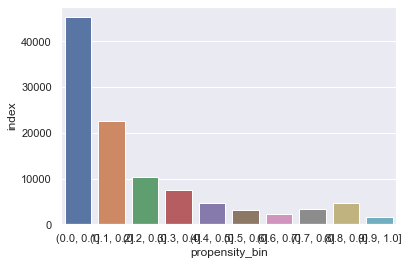

In [127]:
sns.barplot(data=df_propensity, x="propensity_bin", y="index")
sns.set_theme()

# Business Application

In [128]:
#Redefine the grouping into High / Medium / Low Propensity
bins = [0.0, 0.3,0.7,1.0]
Propensity["propensity_bin"] = pd.cut(Propensity['propensity'], bins=bins)
Propensity

,index,propensity,propensity_bin
0,0,0.015758,"(0.0, 0.3]"
1,1,0.072589,"(0.0, 0.3]"
2,2,0.079244,"(0.0, 0.3]"
3,3,0.014817,"(0.0, 0.3]"
4,4,0.015613,"(0.0, 0.3]"
...,...,...,...
105307,105307,0.455697,"(0.3, 0.7]"
105308,105308,0.192293,"(0.0, 0.3]"
105309,105309,0.119519,"(0.0, 0.3]"
105310,105310,0.579042,"(0.3, 0.7]"


In [129]:
df_result = Propensity.groupby("propensity_bin").agg({"index":"count","propensity":"mean"}).reset_index()
df_result

,propensity_bin,index,propensity
0,"(0.0, 0.3]",78093,0.107552
1,"(0.3, 0.7]",17595,0.449843
2,"(0.7, 1.0]",9624,0.826753


In [130]:
df_result["Total_Customers"]=df_result["index"]
df_result = df_result.drop(['index'], axis=1)

In [131]:
# Assume it costs $50 to reach each customer
df_result["Cost"] = df_result["Total_Customers"]*50

In [132]:
df_result

,propensity_bin,propensity,Total_Customers,Cost
0,"(0.0, 0.3]",0.107552,78093,3904650
1,"(0.3, 0.7]",0.449843,17595,879750
2,"(0.7, 1.0]",0.826753,9624,481200


In [134]:
#Estimate total numbers of leads based on the propensity score
df_result["Estimated_Leads"] = df_result["Total_Customers"]*df_result["propensity"]

In [136]:
df_result

,propensity_bin,propensity,Total_Customers,Cost,Estimated_Leads,CPL
0,"(0.0, 0.3]",0.107552,78093,3904650,8399.034990,464.892694
1,"(0.3, 0.7]",0.449843,17595,879750,7914.987324,111.149894
2,"(0.7, 1.0]",0.826753,9624,481200,7956.673450,60.477535


In [135]:
#Calculate the Cost per Leads
df_result["CPL"] = df_result["Cost"]/df_result["Estimated_Leads"]

In [123]:
df_result

,propensity_bin,propensity,Total_Customers,Cost,Estimated_Leads,CPL
0,"(0.0, 0.3]",0.107552,78093,3904650,8399.034990,464.892694
1,"(0.3, 0.7]",0.449843,17595,879750,7914.987324,111.149894
2,"(0.7, 1.0]",0.826753,9624,481200,7956.673450,60.477535
